In [3]:
from geoband.API import *
from geopandas.tools import sjoin


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import json
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString

import pydeck as pdk
import shapefile
import os
import re
import matplotlib 
matplotlib.font_manager._rebuild()
import seaborn as sns

import mapboxgl
from mapboxgl.viz import *
from mapboxgl.utils import create_color_stops

from matplotlib import font_manager, rc
import platform

import requests; from urllib.parse import urlparse
import warnings
warnings.filterwarnings("ignore")

from geoband.API import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import pandas as pd
import json
from pandas import json_normalize
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geoband.API import *
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from geopandas import GeoDataFrame
# GetCompasData로 주피터 노트북 경로에 파일 저장
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from fiona.crs import from_string
from pandas import json_normalize

from geoband.API import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import pandas as pd
import json
from pandas import json_normalize
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geoband.API import *
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from geopandas import GeoDataFrame
# GetCompasData로 주피터 노트북 경로에 파일 저장
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from fiona.crs import from_string

%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') #한글 폰트 지정?

## 상권데이터 처리하기
- 유흥시설 = 유흥주점 + 위락시설
- 숙박시설
- 체육시설

In [3]:
import pandas as pd
suwon_commercial_area = pd.read_excel('25.수원시_상권(업종)현황.xlsx')[["business_nm","com_lc_cd","com_lc_nm",
                                                               "com_mc_cd","com_mc_nm","com_sc_cd","com_sc_nm","ksic_cd","ksic_nm",
                                                               "sido_nm","sgg_cd","sgg_nm","adb_emd_cd",
                                                               "adb_emd_nm","lon","lat"]]

suwon_commercial_area.columns = ["상호명","상권업종대분류코드","상권업종대분류명","상권업종중분류코드","상권업종중분류명",
                                 "상권업종소분류코드","상권업종소분류명","표준산업분류코드","표준산업분류명","시도명",
                                 "시군구코드","시군구명","행정동코드","행정동명","lon","lat"]

suwon_commercial_area_accomo = suwon_commercial_area[suwon_commercial_area["상권업종대분류명"] == "숙박"]
# 숙박시설정보만

In [4]:
suwon_commercial_area_play = suwon_commercial_area[suwon_commercial_area["상권업종대분류명"] == "관광/여가/오락"]
# 유흥시설 정보만
suwon_commercial_area_play["상권업종소분류명"].value_counts()

# 관광/여가/오락 시설 중에서 (+) : "단전호흡","기원","체형미교실","지압원","실내야구연습장","낚시터","실외야구연습장","롤러스케이트장",
# "롤러스케이트장","오락용사격장"
plus = ["단전호흡","기원","체형미교실","지압원","실내야구연습장","낚시터","실외야구연습장","롤러스케이트장","오락용사격장"]
minus = ["노래방","인터넷PC방","당구장","스포츠마사지","안마시술소","게임룸","기타오락관련산업","나이트클럽",
         "무도유흥주점-종합","전자오락실","비디오감상실","무도장","극장식유흥주점"]

# 관광/여가/오락 시설 중에서 (-) : "노래방","인터넷PC방","당구장","스포츠마사지","안마시술소","게임룸","기타오락관련산업","나이트클럽",
# "무도유흥주점-종합","전자오락실","비디오감상실","무도장","극장식유흥주점"

plus_lst = []
for i in plus:
    plus_lst.append(suwon_commercial_area_play[suwon_commercial_area_play["상권업종소분류명"] == i])
    
plus_lst.append(suwon_commercial_area[suwon_commercial_area["상권업종중분류명"] == "스포츠"])
# 스포츠 시설 추가하기
    
minus_lst = []
for i in minus:
    minus_lst.append(suwon_commercial_area_play[suwon_commercial_area_play["상권업종소분류명"] == i])
# 위락시설 추가하기
suwon_commercial_area_play = pd.concat(minus_lst)
# 위락시설

suwon_commercial_area_alcohol = suwon_commercial_area[suwon_commercial_area["상권업종중분류명"] == "유흥주점"]

minus_lst.append(suwon_commercial_area[suwon_commercial_area["상권업종중분류명"] == "유흥주점"])
# 음식 업소 정보 - 중분류에 '유흥주점' 만 가져오기
# 해당 격자내 총 음식점 수 중에서 유흥주점의 수

suwon_commercial_area_play_sport = pd.concat(plus_lst)
# 체육시설

suwon_commercial_area_alcohol_play = pd.concat(minus_lst)
# 유흥주점 + 오락시설 = 유흥시설

In [5]:
suwon_commercial_area_accomo.to_csv("수원시_숙박시설현황.csv",encoding="utf-8-sig",index=False)
suwon_commercial_area_play_sport.to_csv("수원시_체육시설현황.csv",encoding="utf-8-sig",index=False)
suwon_commercial_area_alcohol_play.to_csv("수원시_유흥시설현황.csv",encoding="utf-8-sig",index=False)
suwon_commercial_area_play.to_csv("수원시_위락시설현황.csv",encoding="utf-8-sig",index=False)
suwon_commercial_area_alcohol.to_csv("수원시_유흥주점현황.csv",encoding="utf-8-sig",index=False)
suwon_commercial_area.to_csv("수원시_상업시설현황.csv",encoding="utf-8-sig",index=False)

# 사고다발지역 데이터 처리하기
- 무단횡단
- 스쿨존
- 보행어린이
- 보행고령자
- 자전거

In [ ]:
school_risk_area = pd.read_csv("스쿨존_사고다발.csv",encoding="cp949")
old_risk_area = pd.read_csv("고령_사고다발.csv",encoding="cp949")
bic_risk_area = pd.read_csv("자전거_사고다발.csv",encoding="cp949")
jay_risk_area = pd.read_csv("무단횡단_사고다발.csv",encoding="cp949")
child_risk_area = pd.read_csv("보행어린이_사고다발.csv",encoding="cp949")

사고 유형 컬럼 추가하기

In [ ]:
school_risk_area["사고유형"] = "스쿨존내어린이사고"
old_risk_area["사고유형"] = "보행고령자사고"
bic_risk_area["사고유형"] = "자전거사고"
jay_risk_area["사고유형"] = "보행자무단횡단사고"
child_risk_area["사고유형"] = "보행어린이사고"

모든 사고 유형 합쳐주기

In [ ]:
all_risk_area = pd.concat([school_risk_area,old_risk_area,bic_risk_area,jay_risk_area,child_risk_area],
                         axis=0).reset_index(drop=True)

#### string_to_polygon
- 주어진 df
- polygon 정보가 들어있는 geo_col이 문자열 형식일 때 polygon 형태로 변경해주기

In [ ]:
def string_to_polygon(df,geo_col):
    data = df.copy()
    data["geometry"] = data[geo_col].apply(lambda x : Polygon(eval(x)["coordinates"][0]))
    data.drop(geo_col,axis=1,inplace=True)
    return data

In [ ]:
all_risk_area_geo = string_to_polygon(all_risk_area,"다발지역폴리곤")
all_risk_area_geo = gpd.GeoDataFrame(all_risk_area_geo)

# 2020년 사고다발 데이터만 가져오기
all_risk_area_geo["사고다발지ID"] = all_risk_area_geo["사고다발지ID"].astype(str)
all_risk_area_geo = all_risk_area_geo[all_risk_area_geo["사고다발지ID"].str[:4] == "2020"]

GeoJSON으로 내보내기

In [ ]:
all_risk_area_geo.to_file("사고유형별_사고다발지역.geojson",driver="GeoJSON")

시각화 해보기

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
all_risk_area_geo[(all_risk_area_geo['지점명'].str.contains('수원시'))].plot(color="Yellow",ax=ax)
ax.set_axis_off()

# 카카오 api로 주소 - 위경도 매핑하기

In [1]:
import urllib.request
import urllib.parse
import pandas
import ast
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import urllib
import json
import requests
import openpyxl

In [2]:
def getGPS_kakao(dataframe,column_name):

    headers = {
        'Content-Type': 'application/json; charset=utf-8',
        'Authorization': 'KakaoAK af6232337a3fbce50eb97c25baef9a4c'
    }
    i = 0
    while i < len(dataframe):
        if (i % 1000) == 0:
            print(i)
        address = dataframe.loc[i,column_name]
    
        address = address.encode("utf-8")

        p = urllib.parse.urlencode(
            {
                'query': address
            }
        )
        result = requests.get("https://dapi.kakao.com/v2/local/search/address.json", headers=headers, params=p)
        result = result.json()
        
        if len(result["documents"]) > 0:
            dataframe.loc[i,"위도"] = result["documents"][0]["y"]
            dataframe.loc[i,"경도"] = result["documents"][0]["x"]
        else:
            dataframe.loc[i,"위도"] = 0
            dataframe.loc[i,"경도"] = 0
        i+=1
    return dataframe

#### 표제부 데이터 위경도 매핑

In [ ]:
suwon_building = pd.read_excel("26.수원시_건축물대장(표제부).xlsx")

suwon_building["위도"] = 0 ; suwon_building["경도"] = 0
suwon_building_lat_lon = getGPS_kakao(suwon_building,"plat_plc")
suwon_building_lat_lon = suwon_building_lat_lon.rename(columns={"경도":"lon","위도":"lat"})

In [ ]:
suwon_building_lat_lon.to_csv("26.수원시_건축물대장(표제부)_위경도매핑.csv",encoding="utf-8-sig")

#### 유치원 데이터 위경도 매핑

In [ ]:
others_kinder = pd.read_csv("유치원 현황.csv",encoding="cp949")

others_kinder["위도"] = 0 ; others_kinder["경도"] = 0
others_kinder_lat_lon = getGPS_kakao(others_kinder,"주소")
others_kinder_lat_lon = others_kinder_lat_lon.rename(columns={"경도":"lon","위도":"lat"})

In [ ]:
others_kinder_lat_lon.to_csv("유치원 현황_위경도매핑.csv",encoding="utf-8-sig")

## 공공데이터 포털
- 병원 / 의원 정보 수집

In [2]:
from geoband.API import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import json
from pandas import json_normalize
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from folium import Choropleth
import matplotlib
from datetime import datetime 
# GetCompasData로 주피터 노트북 경로에 파일 저장
from shapely.geometry import Point, Polygon, LineString
from fiona.crs import from_string
matplotlib.rcParams['font.family']="Malgun Gothic"
import requests
from bs4 import BeautifulSoup
import glob, os
import urllib
from urllib.parse import urlencode, quote_plus
import requests
from bs4 import BeautifulSoup
from pandas import json_normalize
import xml.dom.minidom

### 약국주소 가져오기

In [2]:
def 약국매핑(지역):
    ServiceKey = "/Vg1J8MmKzuTqcg1RFWfc3U7B6OLQGu28VZvd9EkkL7l0+IYsdB5Oe0eTm85cUMsNyjZVrFo7GC8fKNxLqKRDA=="
    open_url = 'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire'

    queryParams = '?' + urlencode({ quote_plus('ServiceKey') : ServiceKey,
                                    quote_plus('Q0') : 지역,
                                   quote_plus('pageNo') : '1',
                                   quote_plus('numOfRows') : '10000' })
    open_url_get = open_url + queryParams

    res = requests.get(open_url_get)
    datas = BeautifulSoup(res.content,"html.parser").find_all("item")
    기관주소 = [] ; 기관명 = [] ; 경도 = [] ; 위도 = []

    for data in datas:
        기관주소.append(data.find("dutyaddr").get_text())
        기관명.append(data.find("dutyname").get_text())
        try:
            경도.append(data.find("wgs84lon").get_text()) 
        except: 경도.append(0)
        try:
            위도.append(data.find("wgs84lat").get_text()) 
        except: 위도.append(0)

    df = pd.DataFrame(columns = ["기관주소","기관명","경도","위도"])

    df["기관주소"] = 기관주소
    df["기관명"] = 기관명
    df["경도"] = 경도
    df["위도"] = 위도
    return df

In [3]:
약국_수원 = 약국매핑('수원')
약국_진주 = 약국매핑('진주시')
약국_창원 = 약국매핑('창원시')

서울 약국 가져오기

In [4]:
약국_서울 = pd.read_csv("서울특별시_약국_정보.csv",encoding="cp949")[["주소","약국명","병원경도","병원위도"]]
약국_서울.columns = ["기관주소","기관명","경도","위도"]

In [5]:
약국_4개시 = pd.concat([약국_수원,약국_서울,약국_진주,약국_창원]).reset_index(drop=True)
약국_4개시.columns = ["기관주소","기관명","lon","lat"]
약국_4개시 = 약국_4개시[약국_4개시["lat"].notnull()]

In [6]:
약국_4개시.to_csv("4개시도_약국.csv",encoding="utf-8-sig")

### 병원 주소 가져오기

In [7]:
def 병원매핑(지역):
    ServiceKey = "/Vg1J8MmKzuTqcg1RFWfc3U7B6OLQGu28VZvd9EkkL7l0+IYsdB5Oe0eTm85cUMsNyjZVrFo7GC8fKNxLqKRDA=="
    open_url = 'http://apis.data.go.kr/B552657/HsptlAsembySearchService/getHsptlMdcncListInfoInqire'

    queryParams = '?' + urlencode({ quote_plus('ServiceKey') : ServiceKey,
                                    quote_plus('Q0') : 지역,
                                   quote_plus('pageNo') : '1',
                                   quote_plus('numOfRows') : '10000' })
    open_url_get = open_url + queryParams

    res = requests.get(open_url_get)
    datas = BeautifulSoup(res.content,"html.parser").find_all("item")
    기관주소 = [] ; 기관명 = [] ; 경도 = [] ; 위도 = []

    for data in datas:
        기관주소.append(data.find("dutyaddr").get_text())
        기관명.append(data.find("dutyname").get_text())
        try:
            경도.append(data.find("wgs84lon").get_text()) 
        except: 경도.append(0)
        try:
            위도.append(data.find("wgs84lat").get_text()) 
        except: 위도.append(0)

    df = pd.DataFrame(columns = ["기관주소","기관명","경도","위도"])

    df["기관주소"] = 기관주소
    df["기관명"] = 기관명
    df["경도"] = 경도
    df["위도"] = 위도
    return df

In [10]:
병원_수원 = 병원매핑('수원')
#병원_서울 = 병원매핑('서울특별시')
병원_진주 = 병원매핑('진주시')
병원_창원 = 병원매핑('창원시')

In [13]:
병원_서울 = pd.read_csv("서울특별시_병의원_정보.csv",encoding="cp949")[["주소","기관명","병원경도","병원위도"]]
병원_서울.columns = ["기관주소","기관명","경도","위도"]

In [14]:
병원_4개시 = pd.concat([병원_수원,병원_서울,병원_진주,병원_창원])
병원_4개시.columns = ["기관주소","기관명","lon","lat"]
병원_4개시 = 병원_4개시[병원_4개시["lat"].notnull()]

In [15]:
병원_4개시.to_csv("4개시도_병원.csv",encoding="utf-8-sig")

### 전국 지하철역 데이터

In [55]:
subway = pd.read_csv("전국도시철도역사정보표준데이터.csv",encoding="cp949")[["역사명","역사도로명주소","역경도","역위도"]]
subway.columns = ["기관명","기관주소","lon","lat"]

subway = subway[(subway["기관주소"].str.contains("서울")) | (subway["기관주소"].str.contains("수원"))]
# 서울 수원 데이터만 추출

others_subway = subway.drop_duplicates(["기관주소"],keep="first").reset_index(drop=True)

In [56]:
others_subway.to_csv("4개시도_지하철역.csv",encoding="utf-8-sig")

### 전국 초중고 데이터

In [73]:
others_school = pd.read_csv("한국교원대학교_초중등학교위치.csv",encoding="cp949")[["학교명","학교급구분","소재지도로명주소","경도","위도"]]
others_school = others_school[(others_school["소재지도로명주소"].str.contains("창원")) 
                              | (others_school["소재지도로명주소"].str.contains("진주"))
                              | (others_school["소재지도로명주소"].str.contains("서울"))
                              | (others_school["소재지도로명주소"].str.contains("수원"))]

others_school.columns = ["학교명","학교급구분","소재지도로명주소","lon","lat"]

In [70]:
others_school.to_csv("4개시도_초중고.csv",encoding="utf-8-sig")

### 전국 유치원


### 전국 어린이집

In [76]:
어린이집_창원 = pd.read_excel("어린이집기본정보조회_창원.xls")
어린이집_수원 = pd.read_excel("어린이집기본정보조회_수원.xls")
어린이집_진주 = pd.read_excel("어린이집기본정보조회_진주.xls")
어린이집_서울 = pd.read_excel("어린이집기본정보조회_서울.xls")

others_baby = pd.concat([어린이집_창원,어린이집_수원,어린이집_진주,어린이집_서울])[["어린이집명","운영현황","주소","경도","위도"]]

others_baby = others_baby[(others_baby["운영현황"] == "정상") | (others_baby["운영현황"] == "재개")].reset_index(drop=True)
others_baby.columns = ["어린이집명","운영현황","주소","lon","lat"]
# 정상 운영되는 곳만

In [89]:
others_baby.to_csv("4개시도_어린이집.csv",encoding="utf-8-sig")

# 접근성
- 주차장 접근성
- 경찰서 접근성
- 소방서 접근성

수원시 권선구   41113
수원시 장안구   41111
수원시 영통구   41117
수원시 팔달구   41115

In [23]:
police_near = gpd.read_file("385.1 경찰서 접근성.shp",encoding="utf-8")
parking_near = gpd.read_file("334.1 주차장 접근성.shp",encoding="utf-8")
fire_near = gpd.read_file("387.1 소방서 접근성.shp",encoding="utf-8")
doc_near = gpd.read_file("275.1 의원 접근성.shp",encoding="utf-8")
hos_near = gpd.read_file("281.1 병원 접근성.shp",encoding="utf-8") 
med_near = gpd.read_file("299.1 약국 접근성.shp",encoding="utf-8") 
kinder_near = gpd.read_file("218.1 유치원 접근성.shp",encoding="utf-8") 
baby_near = gpd.read_file("214.1 어린이집 접근성.shp",encoding="utf-8") 
ele_near = gpd.read_file("222.1 초등학교 접근성.shp",encoding="utf-8") ##
lib_near = gpd.read_file("227.1 도서관 접근성.shp",encoding="utf-8") 
cul_near = gpd.read_file("239.1 공연문화시설 접근성.shp",encoding="utf-8")
sport1_near = gpd.read_file("52.1.생활체육시설접근성.shp",encoding="utf-8") 
sport2_near = gpd.read_file("207.1 공공체육시설 접근성.shp",encoding="utf-8") ##
park1_near = gpd.read_file("203.1 주제공원 접근성.shp",encoding="utf-8")
park2_near = gpd.read_file("199.1 생활권공원 접근성.shp",encoding="utf-8")

In [103]:
for j in [ police_near,parking_near,fire_near,doc_near,hos_near,med_near,kinder_near,baby_near,ele_near,
 lib_near,cul_near,sport1_near,sport2_near,park1_near,park2_near ]:
    j.columns = [i.lower() for i in j.columns]
# 전부다 소문자로 열 변경

In [116]:
sport2_near.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
Df
D

KeyboardInterrupt: 

### 접근성 데이터에서 500 격자 추출하기

In [28]:
suwon_police_near = police_near[(police_near["sgg_cd"] == 41111) | (police_near["sgg_cd"] == 41113) |
                               (police_near["sgg_cd"] == 41115) | (police_near["sgg_cd"] == 41117)]
# 수원시 데이터만 추출

suwon_police_near = suwon_police_near.to_crs(epsg="4326")
# 좌표계 4326으로 변환

suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1).rename(columns={"gid":"gid_250"})
# 수원시 격자정보
suwon_112_grid.head(3)

gid_250                                           geometry
0  다사49aa19ab  MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...
1  다사49aa19ba  MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...
2  다사49aa20aa  MULTIPOLYGON (((126.92472 37.27753, 126.92470 ...

In [43]:
suwon_police_near["gid_250"] = suwon_police_near["gid"].apply(lambda x : x[:5]+"a"+x[5:8]+"a")
suwon_police_near["gid_250"] = suwon_police_near["gid"].apply(lambda x : x[:5]+"b"+x[5:8]+"a")
suwon_police_near["gid_250"] = suwon_police_near["gid"].apply(lambda x : x[:5]+"b"+x[5:8]+"b")
suwon_police_near["gid_250"] = suwon_police_near["gid"].apply(lambda x : x[:5]+"a"+x[5:8]+"b")
# 500격자에 할당되는 250격자 매핑해주기

sjoin = pd.merge(suwon_police_near,suwon_112_grid["gid_250"],on="gid_250",how="inner")[["gid","geometry","gid_250"]]
sjoin.head(4)

gid                                           geometry     gid_250
0  다사49b18a  POLYGON ((126.93049 37.25953, 126.93046 37.264...  다사49ba18ab
1  다사49b18b  POLYGON ((126.93046 37.26403, 126.93042 37.268...  다사49ba18bb
2  다사49b19a  POLYGON ((126.93042 37.26854, 126.93039 37.273...  다사49ba19ab
3  다사49b19b  POLYGON ((126.93039 37.27305, 126.93036 37.277...  다사49ba19bb

In [45]:
#sjoin.to_file("수원시_500격자.geojson",driver="GeoJSON")

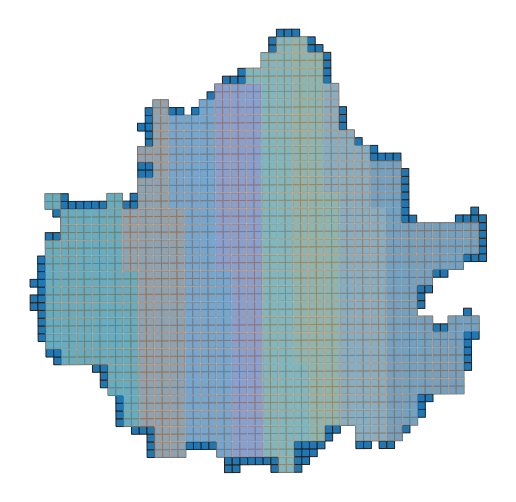

In [40]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=1,ax=ax, edgecolor = '#232323', legend=True)
#test1.plot(linewidth=1,ax=ax,color="red" ,edgecolor = '#232323', legend=True)
sjoin.plot(linewidth=0.5,alpha=0.5,cmap="Pastel2",ax=ax, edgecolor = 'gainsboro', legend=True)
# sjoin은 수원시의 500격자
ax.set_axis_off()

### 접근성 데이터 가공하기
- 수원 500격자에 연결하기 위해

In [101]:
suwon_112_grid_500 = gpd.read_file('수원시_500격자.geojson')
# 수원시 500 격자정보

def get_접근성_data(data,col,suwon_112_grid_500):
    #suwon_data = data[(data["sgg_cd"] == 41111) | (data["sgg_cd"] == 41113) |
    #                              (data["sgg_cd"] == 41115) | (data["sgg_cd"] == 41117)]
    # 수원시 데이터만 추출 -> 코드 없는 곳 존재

    suwon_data = data.to_crs(epsg="4326")[["gid","value"]].rename(columns={"value":col})
    # 좌표계 4326으로 변환

    suwon_data = pd.merge(suwon_data,suwon_112_grid_500,on="gid")
    # 수원시 500 격자와 250 격자 연결
    return suwon_data

In [105]:
suwon_parking_near = get_접근성_data(parking_near,"주차장접근성",suwon_112_grid_500)
suwon_police_near = get_접근성_data(police_near,"경찰서접근성",suwon_112_grid_500)
suwon_fire_near = get_접근성_data(fire_near,"소방서접근성",suwon_112_grid_500)

suwon_doc_near = get_접근성_data(doc_near,"의원접근성",suwon_112_grid_500)
suwon_hos_near = get_접근성_data(hos_near,"병원접근성",suwon_112_grid_500)
suwon_med_near = get_접근성_data(med_near,"약국접근성",suwon_112_grid_500)
suwon_kinder_near = get_접근성_data(kinder_near,"유치원접근성",suwon_112_grid_500)
suwon_baby_near = get_접근성_data(baby_near,"어린이집접근성",suwon_112_grid_500) #
suwon_ele_near = get_접근성_data(ele_near,"초등학교접근성",suwon_112_grid_500) ##
suwon_lib_near = get_접근성_data(lib_near,"도서관접근성",suwon_112_grid_500) ##
suwon_cul_near = get_접근성_data(cul_near,"공연문화시설접근성",suwon_112_grid_500)
suwon_sport1_near = get_접근성_data(sport1_near,"생활체육시설접근성",suwon_112_grid_500)
suwon_sport2_near = get_접근성_data(sport2_near,"공공체육시설접근성",suwon_112_grid_500) ## 
suwon_park1_near = get_접근성_data(park1_near,"주제공원접근성",suwon_112_grid_500) 
suwon_park2_near = get_접근성_data(park2_near,"생활권공원접근성",suwon_112_grid_500)

In [55]:
data = baby_near
suwon_data = data[(data["sgg_cd"] == 41111) | (data["sgg_cd"] == 41113) |
                                   (data["sgg_cd"] == 41115) | (data["sgg_cd"] == 41117)]

In [106]:
result = suwon_112_grid_500
for i in [suwon_parking_near,suwon_police_near,suwon_fire_near,suwon_doc_near,suwon_hos_near,suwon_med_near,suwon_kinder_near,
         suwon_baby_near,suwon_ele_near,suwon_lib_near,suwon_cul_near,suwon_sport1_near,suwon_sport2_near,suwon_park1_near,suwon_park2_near]:
    
    result = pd.merge(result,i.drop("geometry",axis=1),on=["gid","gid_250"],how="left")
    # 결과값 연결

In [107]:
result["공원접근성"] = result["주제공원접근성"] + result["생활권공원접근성"]
result["체육시설접근성"] = result["생활체육시설접근성"] + result["공공체육시설접근성"]
result["병의원접근성"] = result["병원접근성"] + result["의원접근성"]

In [108]:
result.isnull().sum()

gid          0
gid_250      0
geometry     0
주차장접근성       0
경찰서접근성       0
소방서접근성       0
의원접근성        0
병원접근성        0
약국접근성        0
유치원접근성       0
어린이집접근성      0
초등학교접근성      0
도서관접근성       0
공연문화시설접근성    0
생활체육시설접근성    0
공공체육시설접근성    0
주제공원접근성      0
생활권공원접근성     0
공원접근성        0
체육시설접근성      0
병의원접근성       0
dtype: int64

In [112]:
result.to_file("500격자데이터.geojson",driver="GeoJSON")

In [115]:
result

gid     gid_250                                           geometry  \
0    다사49b18a  다사49ba18ab  POLYGON ((126.93049 37.25953, 126.93046 37.264...   
1    다사49b18b  다사49ba18bb  POLYGON ((126.93046 37.26403, 126.93042 37.268...   
2    다사49b19a  다사49ba19ab  POLYGON ((126.93042 37.26854, 126.93039 37.273...   
3    다사49b19b  다사49ba19bb  POLYGON ((126.93039 37.27305, 126.93036 37.277...   
4    다사49b20a  다사49ba20ab  POLYGON ((126.93036 37.27755, 126.93032 37.282...   
..        ...         ...                                                ...   
479  다사62b21a  다사62ba21ab  POLYGON ((127.07694 37.28718, 127.07692 37.291...   
480  다사62b21b  다사62ba21bb  POLYGON ((127.07692 37.29169, 127.07689 37.296...   
481  다사63a18b  다사63aa18bb  POLYGON ((127.08271 37.26467, 127.08268 37.269...   
482  다사63a21a  다사63aa21ab  POLYGON ((127.08258 37.28720, 127.08256 37.291...   
483  다사63a21b  다사63aa21bb  POLYGON ((127.08256 37.29171, 127.08253 37.296...   

     주차장접근성  경찰서접근성   소방서접근성    의원접근성     병원접근성     약국접근성  유치원접근성  ...  \
0     2.437   3.154  5.15938  2.57404  3.062490  2.581407   2.329  ...   
1     2.229   2.498  5.41407  1.45173  2.854181  1.459098   1.609  ...   
2     2.582   2.376  5.51262  1.15628  2.581755  1.163645   0.821  ...   
3     2.911   2.168  5.84168  1.14445  2.373819  0.697984   0.480  ...   
4     4.082   2.255  6.38357  2.06302  3.134391  2.063017   2.318  ...   
..      ...     ...      ...      ...       ...       ...     ...  ...   
479   2.036   3.641  5.23336  4.28150  4.041695  4.281500   3.961  ...   
480   0.902   2.162  3.61776  1.33753  1.958569  1.337527   1.142  ...   
481   2.265   2.508  3.72993  1.41730  1.555210  1.481683   0.992  ...   
482   1.224   2.830  4.42170  3.46984  3.230039  3.469844   3.149  ...   
483   3.970   3.425  4.19974  4.45366  2.909105  4.453657   4.580  ...   

     초등학교접근성  도서관접근성  공연문화시설접근성  생활체육시설접근성  공공체육시설접근성  주제공원접근성  생활권공원접근성  \
0      2.209   2.025      8.436  13.546174      5.411    2.142     1.864   
1      1.675   0.903      8.693  12.423866      5.666    1.236     1.122   
2      0.821   0.799      8.493  11.875413      5.225    1.061     1.244   
3      0.480   0.339      8.189  11.811477      5.281    1.390     0.725   
4      2.117   1.781      7.022  10.847048      5.565    2.149     1.963   
..       ...     ...        ...        ...        ...      ...       ...   
479    3.961   3.387      5.316  16.492073      5.681    7.908     3.951   
480    1.142   0.331      3.950  13.436795      3.324    4.680     0.896   
481    0.992   1.405      3.519  17.911889      3.435    6.081     1.319   
482    3.149   2.575      4.504  15.680417      4.870    7.097     3.139   
483    4.580   3.399      3.754  13.213045      2.105    6.124     3.964   

      공원접근성    체육시설접근성    병의원접근성  
0     4.006  18.957174  5.636530  
1     2.358  18.089866  4.305911  
2     2.305  17.100413  3.738035  
3     2.115  17.092477  3.518269  
4     4.112  16.412048  5.197411  
..      ...        ...       ...  
479  11.859  22.173073  8.323195  
480   5.576  16.760795  3.296099  
481   7.400  21.346889  2.972510  
482  10.236  20.550417  6.699879  
483  10.088  15.318045  7.362765  

[484 rows x 21 columns]

In [110]:
while True:
    print(3)

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


KeyboardInterrupt: 

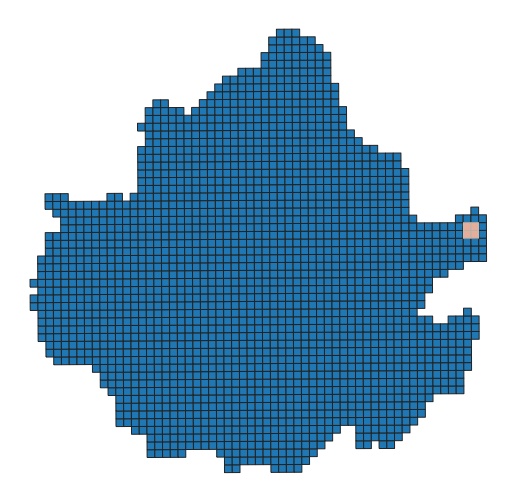

In [100]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=1,ax=ax, edgecolor = '#232323', legend=True)
test1.plot(linewidth=1,ax=ax,color="red" ,edgecolor = '#232323', legend=True)
test.plot(linewidth=0.5,alpha=0.1,cmap="Pastel2",ax=ax, edgecolor = 'gainsboro', legend=True)
ax.set_axis_off()

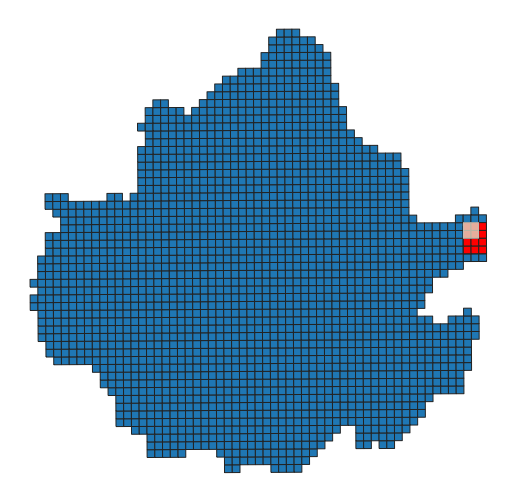

In [98]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=1,ax=ax, edgecolor = '#232323', legend=True)
test1.plot(linewidth=1,ax=ax,color="red" ,edgecolor = '#232323', legend=True)
test.plot(linewidth=0.5,alpha=0.1,cmap="Pastel2",ax=ax, edgecolor = 'gainsboro', legend=True)
ax.set_axis_off()

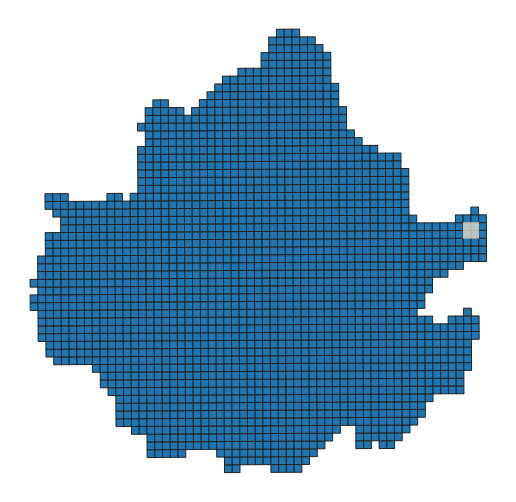

In [86]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=1,ax=ax, edgecolor = '#232323', legend=True)
test.plot(linewidth=0.5,alpha=0.1,cmap="Pastel2",ax=ax, edgecolor = 'gainsboro', legend=True)
ax.set_axis_off()